In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from scipy import signal
from PIL import Image
import argparse

# Copy the path of the folder that contains this notebook using the file navigation on the left:
# Ex. /content/drive/My\ Drive/CIS 581-Online/Canny Edge Project/Learner Code and Images/Code
sys.path.append('')

# import functions
#from helpers import interp2

# Tests and Visualization

In [ ]:
def Test_script(I, E):
    test_pass = True

    # E should be 2D matrix
    if E.ndim != 2:
      print('ERROR: Incorrect Edge map dimension! \n')
      print(E.ndim)
      test_pass = False
    # end if

    # E should have same size with original image
    nr_I, nc_I = I.shape[0], I.shape[1]
    nr_E, nc_E = E.shape[0], E.shape[1]

    if nr_I != nr_E or nc_I != nc_E:
      print('ERROR: Edge map size has changed during operations! \n')
      test_pass = False
    # end if

    # E should be a binary matrix so that element should be either 1 or 0
    numEle = E.size
    numOnes, numZeros = E[E == 1].size, E[E == 0].size

    if numEle != (numOnes + numZeros):
      print('ERROR: Edge map is not binary one! \n')
      test_pass = False
    # end if

    if test_pass:
      print('Shape Test Passed! \n')
    else:
      print('Shape Test Failed! \n')

    return test_pass

In [ ]:
'''
  Derivatives visualzation function
'''
def visDerivatives(I_gray, Mag, Magx, Magy):
    fig, (Ax0, Ax1, Ax2, Ax3) = plt.subplots(1, 4, figsize = (20, 8))

    Ax0.imshow(Mag, cmap='gray', interpolation='nearest')
    Ax0.axis('off')
    Ax0.set_title('Gradient Magnitude')

    Ax1.imshow(Magx, cmap='gray', interpolation='nearest')
    Ax1.axis('off')
    Ax1.set_title('Gradient Magnitude (x axis)')
    
    Ax2.imshow(Magy, cmap='gray', interpolation='nearest')
    Ax2.axis('off')
    Ax2.set_title('Gradient Magnitude (y axis)')

    # plot gradient orientation
    Mag_vec = Mag.transpose().reshape(1, Mag.shape[0] * Mag.shape[1]) 
    hist, bin_edge = np.histogram(Mag_vec.transpose(), 100)

    ind_array = np.array(np.where( (np.cumsum(hist).astype(float) / hist.sum()) < 0.95))
    thr = bin_edge[ind_array[0, -1]]

    ind_remove = np.where(np.abs(Mag) < thr)
    Magx[ind_remove] = 0
    Magy[ind_remove] = 0

    X, Y = np.meshgrid(np.arange(0, Mag.shape[1], 1), np.arange(0, Mag.shape[0], 1))
    Ori = np.arctan2(Magy, Magx)
    ori = Ax3.imshow(Ori, cmap='hsv')
    Ax3.axis('off')
    Ax3.set_title('Gradient Orientation')
    fig.colorbar(ori, ax=Ax3, )
    


'''
  Edge detection result visualization function
'''
def visCannyEdge(Im_raw, M, E):
    # plot image
    fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize = (12, 12))

    # plot original image
    ax0.imshow(Im_raw)
    ax0.axis("off")
    ax0.set_title('Raw image')

    # plot edge detection result
    ax1.imshow(M, cmap='gray', interpolation='nearest')
    ax1.axis("off")
    ax1.set_title('Non-Max Suppression Result')

    # plot original image
    ax2.imshow(E, cmap='gray', interpolation='nearest')
    ax2.axis("off") 
    ax2.set_title('Canny Edge Detection')

# Functions

In [ ]:
'''
  Convert RGB image to gray one manually
  - Input I_rgb: 3-dimensional rgb image
  - Output I_gray: 2-dimensional grayscale image
'''
def rgb2gray(I_rgb):
    r, g, b = I_rgb[:, :, 0], I_rgb[:, :, 1], I_rgb[:, :, 2]
    I_gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return I_gray

In [ ]:
def findDerivatives(I_gray):
    '''
    File clarification:
        Compute gradient information of the input grayscale image
        - Input I_gray: H x W matrix as image
        - Output Mag: H x W matrix represents the magnitude of derivatives
        - Output Magx: H x W matrix represents the magnitude of derivatives along x-axis
        - Output Magy: H x W matrix represents the magnitude of derivatives along y-axis
        - Output Ori: H x W matrix represents the orientation of derivatives
    '''

    G = [[2.0/159.0, 4.0/159.0, 5.0/159.0, 4.0/159.0, 2.0/159.0], 
       [4.0/159.0, 9.0/159.0, 12.0/159.0, 9.0/159.0, 4.0/159.0], 
       [5.0/159.0, 12.0/159.0, 15.0/159.0, 12.0/159.0, 5.0/159.0],
       [4.0/159.0, 9.0/159.0, 12.0/159.0, 9.0/159.0, 4.0/159.0],
       [2.0/159.0, 4.0/159.0, 5.0/159.0, 4.0/159.0, 2.0/159.0]]

    dx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
    dy = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

    dx = signal.convolve2d(G, dx,'same')
    dy = signal.convolve2d(G, dy,'same')
    Magx = signal.convolve2d(I_gray, dx,'same')
    Magy = signal.convolve2d(I_gray, dy,'same')

    Mag = np.sqrt(Magx*Magx + Magy*Magy);
    Ori = np.arctan2(Magy, Magx, out=None)

    return Mag, Magx, Magy, Ori

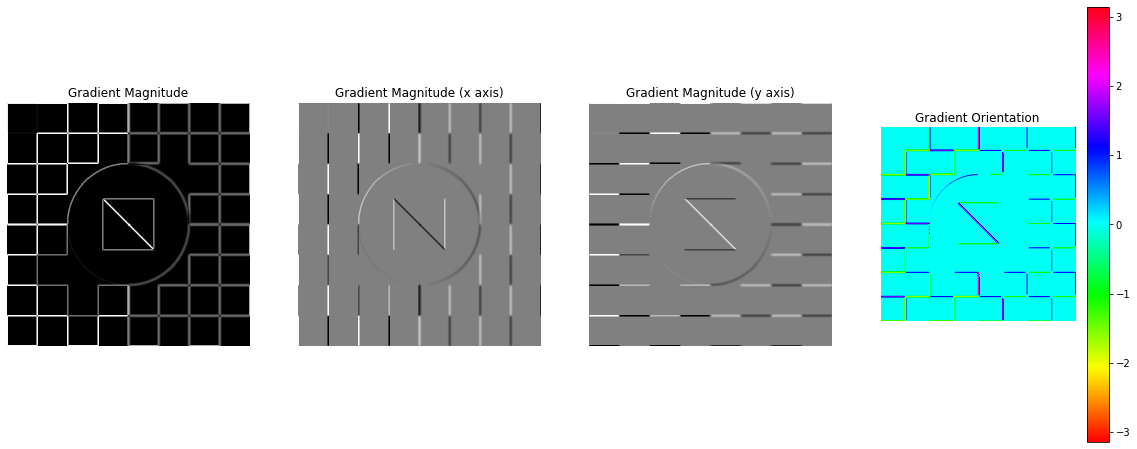

In [ ]:
I = plt.imread('/content/drive/MyDrive/Code/Images/I1.jpg')
Mag, Magx, Magy, Ori = findDerivatives(I)
visDerivatives(I, Mag, Magx, Magy)

In [ ]:
## Test ##

# you may need to change the path to I1.jpg under Images folder
I = plt.imread('/content/drive/MyDrive/Code/Images/I1.jpg')
Mag, Magx, Magy, Ori = findDerivatives(I)
assert np.allclose(Mag, np.load('/content/drive/MyDrive/Code/Mag.npy'))
assert np.allclose(Magx, np.load('/content/drive/MyDrive/Code/Magx.npy'))
assert np.allclose(Magy, np.load('/content/drive/MyDrive/Code/Magy.npy'))
assert np.allclose(Ori, np.load('//content/drive/MyDrive/Code/Ori.npy'))

In [ ]:
def interp2(v, xq, yq):

	if len(xq.shape) == 2 or len(yq.shape) == 2:
		dim_input = 2
		q_h = xq.shape[0]
		q_w = xq.shape[1]
		xq = xq.flatten()
		yq = yq.flatten()

	h = v.shape[0]
	w = v.shape[1]
	if xq.shape != yq.shape:
		raise 'query coordinates Xq Yq should have same shape'

	x_floor = np.floor(xq).astype(np.int32)
	y_floor = np.floor(yq).astype(np.int32)
	x_ceil = np.ceil(xq).astype(np.int32)
	y_ceil = np.ceil(yq).astype(np.int32)

	x_floor[x_floor < 0] = 0
	y_floor[y_floor < 0] = 0
	x_ceil[x_ceil < 0] = 0
	y_ceil[y_ceil < 0] = 0

	x_floor[x_floor >= w-1] = w-1
	y_floor[y_floor >= h-1] = h-1
	x_ceil[x_ceil >= w-1] = w-1
	y_ceil[y_ceil >= h-1] = h-1

	v1 = v[y_floor, x_floor]
	v2 = v[y_floor, x_ceil]
	v3 = v[y_ceil, x_floor]
	v4 = v[y_ceil, x_ceil]

	lh = yq - y_floor
	lw = xq - x_floor
	hh = 1 - lh
	hw = 1 - lw

	w1 = hh * hw
	w2 = hh * lw
	w3 = lh * hw
	w4 = lh * lw

	interp_val = v1 * w1 + w2 * v2 + w3 * v3 + w4 * v4

	if dim_input == 2:
		return interp_val.reshape(q_h, q_w)
	return interp_val

In [1]:
def nonMaxSup(Mag, Ori):
    '''
    File clarification:
        Find local maximum edge pixel using NMS along the line of the gradient
        - Input Mag: H x W matrix represents the magnitude of derivatives
        - Input Ori: H x W matrix represents the orientation of derivatives
        - Output M: H x W binary matrix represents the edge map after non-maximum suppression
    '''
    nc, nr = Ori.shape[1], Ori.shape[0]
    x, y = np.meshgrid(np.arange(nc), np.arange(nr))

    cos_map = np.cos(Ori) + x
    cos_map_oob = np.logical_and(np.around(cos_map, 5) >= 0, cos_map <= (nc - 1))
    sin_map = np.sin(Ori) + y
    sin_map_oob = np.logical_and(np.around(sin_map, 5) >= 0, sin_map <= (nr - 1))

    forward_oob = np.logical_and(sin_map_oob, cos_map_oob)
    neighbor1 = interp2(Mag, cos_map, sin_map)
    N1_trim = np.multiply(neighbor1, forward_oob)

    cos_map_neg = np.cos(Ori + np.pi) + x
    cos_map_neg_oob = np.logical_and(np.around(cos_map_neg, 5) >= 0, cos_map_neg <= (nc - 1))
    sin_map_neg = np.sin(Ori + np.pi) + y
    sin_map_neg_oob = np.logical_and(np.around(sin_map_neg, 5) >= 0, sin_map_neg <= (nr - 1))
    
    backwards_oob = np.logical_and(sin_map_neg_oob, cos_map_neg_oob)
    neighbor2 = interp2(Mag, cos_map_neg, sin_map_neg)
    N2_trim = np.multiply(neighbor2, backwards_oob)

    binary_map = np.logical_and(Mag >= N1_trim, Mag >= N2_trim)
    return binary_map

In [ ]:
## Test ##
Mag = np.array([[0, 2, 12, 16],
                [4, 9, 11, 8],
                [7, 17, 12, 9],
                [0, 19, 21, 17]])
Ori = np.array([[np.pi/2, np.pi/4, 0, np.pi/4],
                [np.pi/4, np.pi/4, np.pi/4, np.pi/2],
                [np.pi/4, 0, np.pi/2, np.pi/4],
                [np.pi/2, np.pi/4, np.pi/2, np.pi/4]])
res = np.array([[False, False, False,  True],
       [False, False,  True, False],
       [False,  True, False, False],
       [False,  True,  True,  True]])
M = nonMaxSup(Mag, Ori)
assert M.dtype == bool
assert M.shape == Mag.shape
assert np.allclose(M, res)

In [ ]:
def edgeLink(M, Mag, Ori,low,high):
  '''
    File clarification:
        Use hysteresis to link edges based on high and low magnitude thresholds
        - Input M: H x W logical map after non-max suppression
        - Input Mag: H x W matrix represents the magnitude of gradient
        - Input Ori: H x W matrix represents the orientation of gradient
        - Input low, high: low and high thresholds 
        - Output E: H x W binary matrix represents the final canny edge detection map
    '''
  
  edgeMap = M * Mag
  updatedMap = edgeMap
  mean = np.mean(Mag)
  median = np.median(Mag)
  std_dev = np.std(Mag)

  high_threshold = high
  low_threshold = low

  strongEdgeMap = (edgeMap >= high_threshold) * 1
  weakEdgeMap = np.logical_and(edgeMap > low_threshold, edgeMap < high_threshold)*1

  X,Y = np.meshgrid(np.arange(M.shape[1]),np.arange(M.shape[0]))
  nr = Ori.shape[0];
  nc = Ori.shape[1];

  OriEdge1 = Ori + (np.pi/2)
  x1= X + np.cos(OriEdge1)
  y1= Y + np.sin(OriEdge1)
  OriEdge2 = Ori - (np.pi/2)
  x2= X + np.cos(OriEdge2)
  y2= Y + np.sin(OriEdge2)

  x1 = np.clip(X-1,0,nc-1)
  x2 = np.clip(X+1,0,nc-1)
  y1 = np.clip(Y+1,0,nr-1)
  y2 = np.clip(Y-1,0,nr-1)

  edge1x = weakEdgeMap * x1
  edge1y = weakEdgeMap * y1
  edge2x = weakEdgeMap * x2
  edge2y = weakEdgeMap * y2

  strongEdgeMap_old = np.empty(strongEdgeMap.shape)
  weakEdgeMap_new = weakEdgeMap

  while True:
      side1 = weakEdgeMap_new * (interp2(updatedMap,edge1x,edge1y) >= high_threshold)
      side2 = weakEdgeMap_new * (interp2(updatedMap,edge2x,edge2y) >= high_threshold)
      sides = np.asarray(side1 + side2,dtype=bool)
      updatedMap = edgeMap + sides * high_threshold
      weakEdgeMap_new = weakEdgeMap - sides
      strongEdgeMap = np.asarray(strongEdgeMap + sides,dtype=bool)
      edge1x = weakEdgeMap_new * x1
      edge1y = weakEdgeMap_new * y1
      edge2x = weakEdgeMap_new * x2
      edge2y = weakEdgeMap_new * y2

      if np.array_equal(strongEdgeMap_old, strongEdgeMap):
          return strongEdgeMap
      else:
          strongEdgeMap_old = strongEdgeMap


In [ ]:
## Test ##
M = np.array([[True, False, True,  True],
              [False, True,  True, True],
              [True,  True, False, False],
              [False,  True,  True,  True]])
Mag = np.array([[12, 9, 14, 16],
                [4, 11, 40, 18],
                [13, 12, 30, 15],
                [28, 15, 21, 8]])
Ori = np.array([[np.pi/2, np.pi/4, 0, np.pi/4],
                [np.pi/4, np.pi/4, np.pi/4, np.pi/2],
                [np.pi/4, 0, np.pi/2, np.pi/4],
                [np.pi/2, np.pi/4, np.pi/2, np.pi/4]])
res = np.array([[False, False,  True,  True],
       [False,  True,  True,  True],
       [ True,  True, False, False],
       [False, False,  True, False]])
low, high = 10, 20
# print(res)
E = edgeLink(M, Mag, Ori, low, high)
assert E.dtype == bool
assert E.shape == Mag.shape
assert np.allclose(E, res)

In [2]:
def cannyEdge(I, low, high):
    # convert RGB image to gray color space
    im_gray = rgb2gray(I)

    Mag, Magx, Magy, Ori = findDerivatives(im_gray)
    M = nonMaxSup(Mag, Ori)
    E = edgeLink(M, Mag, Ori, low, high)
 
    # only when test passed that can show all results
    
    if Test_script(im_gray, E):
        # visualization results
        visDerivatives(im_gray, Mag, Magx, Magy)
        visCannyEdge(I, M, E)

        plt.show()

    return E
# print(np.amax(Mag))

## Simple image test cases
First, let's try to detect edges in two simple images.

![checkerboard.jpg](Test_Images/rotated_checkerboard.jpg)

For the rotated checkerboard, We should be able to get edges in both directions.

![checkerboard_res.jpg](Test_Images/rotated_checkerboard_Result.png)

![coins.png](Test_Images/coins.png) 

For coins, we should be able to detect circles.

![coins.png](Test_Images/coins_Result.png) 

30 12
Shape Test Passed! 



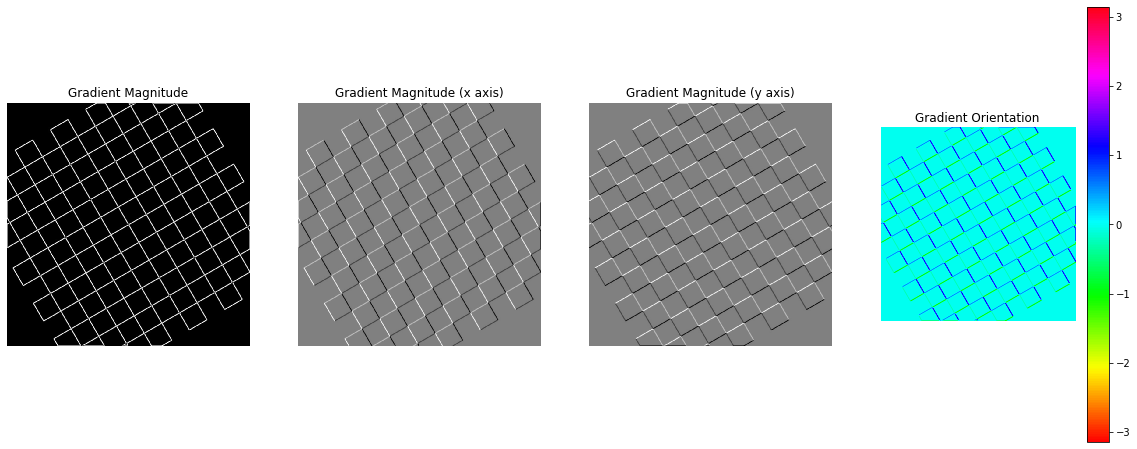

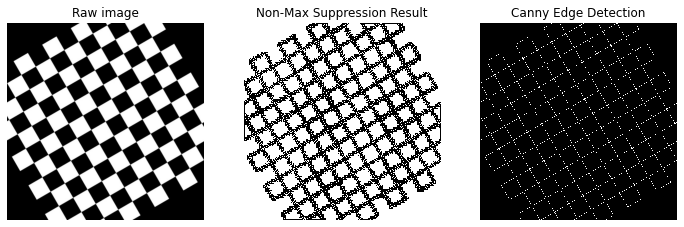

In [ ]:
# tuning threshold for simple test images
image_folder = "/content/drive/MyDrive/Code/Test_Images/"
save_folder = "/content/drive/MyDrive/Code/Results/" # need to create this folder in the drive
filename='rotated_checkerboard.jpg' # TODO: change image name 
I = np.array(Image.open(os.path.join(image_folder, filename)).convert('RGB'))
low, high = 12, 30
#coins 80, 80
#checkerboard 12, 30
E = cannyEdge(I, low, high)
pil_image = Image.fromarray(E.astype(np.uint8) * 255).convert('L')
# check the result in the folder
pil_image.save(os.path.join(save_folder, "{}_Result.png".format(filename.split(".")[0])))

## Tune the threshold for each images under "Image" folder

In [ ]:
 # list all image names
 os.listdir('/content/drive/MyDrive/Code/Images/')

['48017.jpg',
 '3096.jpg',
 '189080.jpg',
 '21077.jpg',
 '16068.jpg',
 '55067.jpg',
 '135069.jpg',
 '118035.jpg',
 '86000.jpg',
 '22013.jpg',
 'I1.jpg',
 '201080.jpg']

Shape Test Passed! 



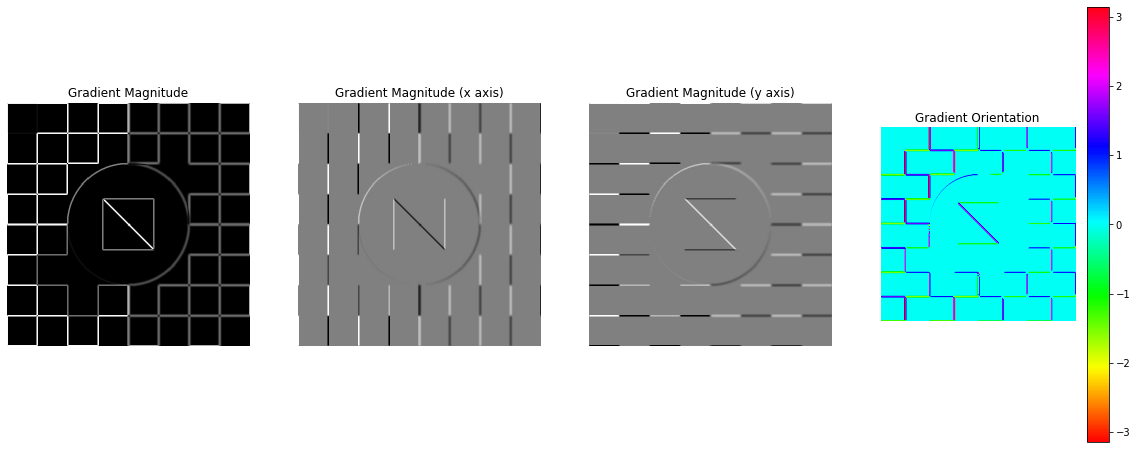

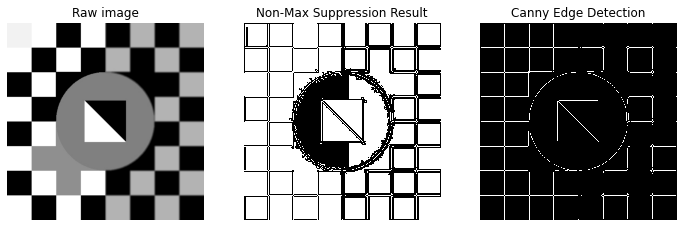

In [ ]:
# tuning threshold for a single image
image_folder = "/content/drive/MyDrive/Code/Images/"
save_folder = "/content/drive/MyDrive/Code/Results" # need to create this folder in the drive
filename='I1.jpg' # TODO: change image name 
I = np.array(Image.open(os.path.join(image_folder, filename)).convert('RGB'))
# I =imread('/content/gdrive/MyDrive/CannyEdge/Code/Images/118035.jpg')
low, high = 0, 2
E = cannyEdge(I, low, high)
pil_image = Image.fromarray(E.astype(np.uint8) * 255).convert('L')
# check the result in the folder
pil_image.save(os.path.join(save_folder, "{}_Result.png".format(filename.split(".")[0])))

# Fill in all tuned threshold to generate edge detection results


In [ ]:
# keep results for all images
image_folder = "Images"
save_folder = "Results"
# fill in the threshold (low, high) you have tuned in the cell above 
thresh_dict = {'118035.jpg': (5, 5.5),
                '135069.jpg': (10, 35),
                '16068.jpg': (25, 65),
                '189080.jpg': (10, 20),
                '201080.jpg': (5, 20),
                '21077.jpg': (10, 40),
                '22013.jpg': (6, 22),
                '3096.jpg': (0, 39),
                '48017.jpg': (15, 20),
                '55067.jpg': (1, 10),
                '86000.jpg': (6, 15),
                'I1.jpg': (0, 2)}
# generate results one by one
for filename in os.listdir(image_folder):
    # read in image 
    im_path = os.path.join(image_folder, filename)
    I = np.array(Image.open(im_path).convert('RGB'))

    low, high = thresh_dict[filename]
    E = cannyEdge(I, low, high)

    pil_image = Image.fromarray(E.astype(np.uint8) * 255).convert('L')

    pil_image.save(os.path.join(save_folder, "{}_Result.png".format(filename.split(".")[0])))

NameError: ignored